# **Scrapbook**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import statsmodels.api as sm
scaler = StandardScaler()
le = preprocessing.LabelEncoder()
enc = OneHotEncoder()
#import xgboost as xgb


## **Data Exploring** 

### Num of flights per 'op_unique_carrier'

In [24]:
OP_unique_carrier = pd.read_excel('Num Flights by op_unique_carrier.xlsx')

##### Might be interesting to give 'weight' to carriers by assigning a numerical classification based on number of flights (**should be** higher number for higher number of flights **??**)

In [25]:
OP_unique_carrier['category'] = [1,2,2,2,2,3,3,3,3,3,3,4,4,4,5,5,5,5,5,5,5,5,5,5,6,6,6,6]

In [26]:
OP_unique_carrier.head()

,flights_by_carrier,op_unique_carrier,category
0,2713963,WN,1
1,1939694,DL,2
2,1862100,AA,2
3,1609494,OO,2
4,1246563,UA,2


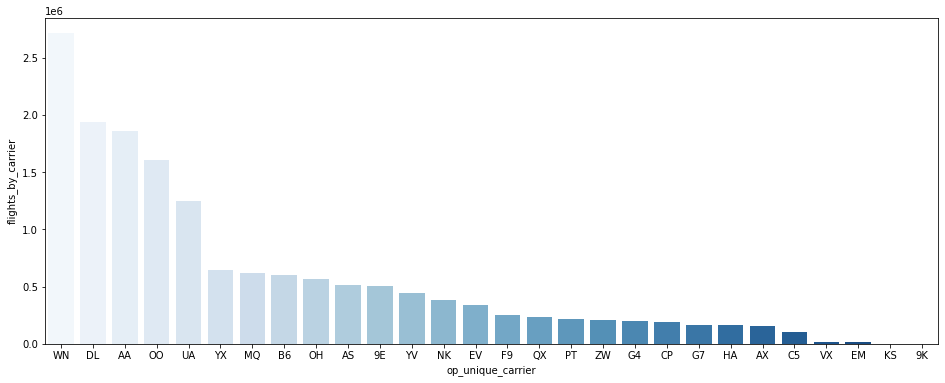

In [42]:
plt.figure(figsize=(16, 6))
sns.barplot(x=OP_unique_carrier['op_unique_carrier'], y=OP_unique_carrier['flights_by_carrier'], palette="Blues")

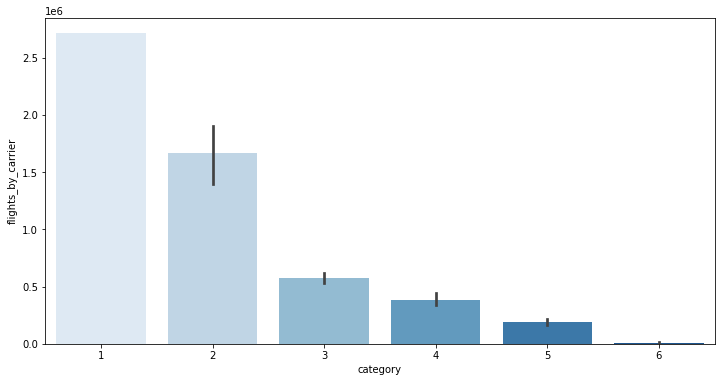

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x=OP_unique_carrier['category'], y=OP_unique_carrier['flights_by_carrier'], palette="Blues")

### Number of flights leaving from 'origin'

In [ ]:
flights_per_origin = pd.read_excel('Test_Data/num_flights_origin.xlsx')
flights_per_origin.head(20)


### 'origin'(s) with most traffic

In [43]:
# Origins with most traffic
max_flights_origin = flights_per_origin.head(20)
max_flights_origin

,num_flights_origin,origin
0,790253,ORD
1,785850,ATL
2,584688,DFW
3,552134,DEN
4,501557,CLT
5,500840,LAX
6,379367,SEA
7,357626,SFO
8,355485,PHX
9,354379,IAH


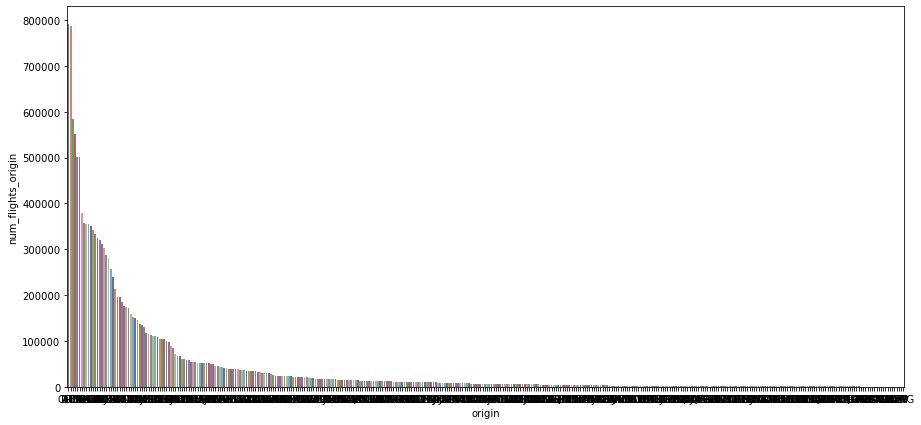

In [34]:
#Avg flights from origin
plt.figure(figsize=(15, 7))
sns.barplot(x=flights_per_origin['origin'], y=flights_per_origin['num_flights_origin'], palette="deep")

### Avg arrival delay for flights departing from 'origin'

In [39]:
avg_arr_delay_origin = pd.read_excel('Test_Data/avg_arr_delay_origin.xlsx')
avg_arr_delay_origin.head(15)

,avg_delay_origin,origin
0,75.000000,YNG
1,33.334711,PPG
2,31.890819,XWA
3,30.889919,PQI
4,26.672245,OTH
5,25.988304,HYA
6,24.056026,ACK
7,23.990769,MMH
8,22.344937,HGR
9,22.017926,SLN


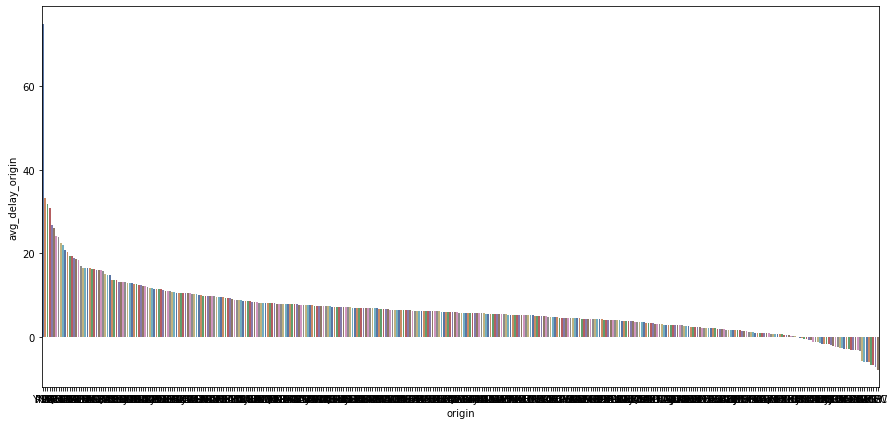

In [35]:
# avg arrival delay for flights departing from origin
plt.figure(figsize=(15, 7))
sns.barplot(x=avg_arr_delay_origin['origin'], y=avg_arr_delay_origin['avg_delay_origin'], palette="deep")

## **Model Testing**

In [2]:
testData = pd.read_excel('Test_Data/testData.xlsx')

In [3]:
testData

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,crs_arr_time,arr_time,taxi_out,taxi_in,distance,arr_delay
0,2018-01-28,WN,WN,SNA,"Santa Ana, CA",SJC,"San Jose, CA",1615,1614,1735,1726,11,4,342,-9
1,2018-01-08,AA,YV,CHA,"Chattanooga, TN",DFW,"Dallas/Fort Worth, TX",1635,1632,1753,1738,12,11,695,-15
2,2018-01-20,WN,WN,DEN,"Denver, CO",SEA,"Seattle, WA",2035,2029,2235,2207,11,5,1024,-28
3,2018-01-14,WN,WN,JAX,"Jacksonville, FL",BWI,"Baltimore, MD",825,817,1015,959,18,5,663,-16
4,2018-01-04,WN,WN,BWI,"Baltimore, MD",BNA,"Nashville, TN",620,617,725,751,61,4,587,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2018-01-12,DL,DL,DCA,"Washington, DC",ATL,"Atlanta, GA",659,656,908,927,33,4,547,19
9996,2018-01-29,DL,DL,ATL,"Atlanta, GA",LAS,"Las Vegas, NV",941,939,1120,1053,17,5,1747,-27
9997,2018-01-29,WN,WN,SJC,"San Jose, CA",PHX,"Phoenix, AZ",1840,1919,2125,2211,13,6,621,46
9998,2018-01-08,DL,OO,FCA,"Kalispell, MT",MSP,"Minneapolis, MN",1440,1435,1831,1757,15,5,1026,-34


### Use this for categorizing 'origin' **OR**

In [4]:
testData.replace({'origin': {'JFK':1.0, 'MCO':1.5, 'DCA':2.0, 'BOS':2.5, 'PHL':3.0, 'EWR':3.5, 'MSP':4.0, 'LAS':4.5, 'LGA':5.0, 'DTW':5.5, 'IAH':6.0, 'PHX': 6.5, 'SFO':7.0, 'SEA':7.5, 'LAX':8, 'CLT':8.5,
                                  'DEN':9.0, 'DFW':9.5, 'ATL':10.0, 'ORD':10.0}}, inplace=True)

### Use this one

In [4]:
testData.replace({'origin': {'JFK':32.5, 'MCO':35.0, 'DCA':36.0, 'BOS':38.0, 'PHL':39.0, 'EWR':40.5, 'MSP':41.0, 'LAS':42.0, 'LGA':43.0, 'DTW':43.5, 'IAH':45.0, 'PHX': 45.0, 'SFO':45.0, 'SEA':48.0, 'LAX':63.0, 'CLT':63.4,
                                  'DEN':69.8, 'DFW':73.9, 'ATL':99.0, 'ORD':100.0}}, inplace=True)

In [5]:
testData.head()

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,crs_arr_time,arr_time,taxi_out,taxi_in,distance,arr_delay
0,2018-01-28,WN,WN,SNA,"Santa Ana, CA",SJC,"San Jose, CA",1615,1614,1735,1726,11,4,342,-9
1,2018-01-08,AA,YV,CHA,"Chattanooga, TN",DFW,"Dallas/Fort Worth, TX",1635,1632,1753,1738,12,11,695,-15
2,2018-01-20,WN,WN,69.8,"Denver, CO",SEA,"Seattle, WA",2035,2029,2235,2207,11,5,1024,-28
3,2018-01-14,WN,WN,JAX,"Jacksonville, FL",BWI,"Baltimore, MD",825,817,1015,959,18,5,663,-16
4,2018-01-04,WN,WN,BWI,"Baltimore, MD",BNA,"Nashville, TN",620,617,725,751,61,4,587,26


#### Converting str to NaN and then to 0:

In [6]:
# converting str to NaN in origin
testData['origin'] = pd.to_numeric(testData['origin'], errors='coerce')
testData.head()

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,crs_arr_time,arr_time,taxi_out,taxi_in,distance,arr_delay
0,2018-01-28,WN,WN,NaN,"Santa Ana, CA",SJC,"San Jose, CA",1615,1614,1735,1726,11,4,342,-9
1,2018-01-08,AA,YV,NaN,"Chattanooga, TN",DFW,"Dallas/Fort Worth, TX",1635,1632,1753,1738,12,11,695,-15
2,2018-01-20,WN,WN,69.8,"Denver, CO",SEA,"Seattle, WA",2035,2029,2235,2207,11,5,1024,-28
3,2018-01-14,WN,WN,NaN,"Jacksonville, FL",BWI,"Baltimore, MD",825,817,1015,959,18,5,663,-16
4,2018-01-04,WN,WN,NaN,"Baltimore, MD",BNA,"Nashville, TN",620,617,725,751,61,4,587,26


In [7]:
# Converting NaN to 0
testData['origin'] = testData['origin'].fillna(0)
testData.head()

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,crs_arr_time,arr_time,taxi_out,taxi_in,distance,arr_delay
0,2018-01-28,WN,WN,0.0,"Santa Ana, CA",SJC,"San Jose, CA",1615,1614,1735,1726,11,4,342,-9
1,2018-01-08,AA,YV,0.0,"Chattanooga, TN",DFW,"Dallas/Fort Worth, TX",1635,1632,1753,1738,12,11,695,-15
2,2018-01-20,WN,WN,69.8,"Denver, CO",SEA,"Seattle, WA",2035,2029,2235,2207,11,5,1024,-28
3,2018-01-14,WN,WN,0.0,"Jacksonville, FL",BWI,"Baltimore, MD",825,817,1015,959,18,5,663,-16
4,2018-01-04,WN,WN,0.0,"Baltimore, MD",BNA,"Nashville, TN",620,617,725,751,61,4,587,26


#### **Converting** 'fl_date' to dateTime and then **Extracting** 'Month':

In [9]:
# Converting to DateTime
testData['fl_date'] = pd.to_datetime(testData.fl_date, format="%Y-%m-%d")

#Extracting Month
testData['month'] = testData['fl_date'].dt.month

#### Use these dummy variables (mkt_unique_carrier) **OR**:

In [10]:
# Creating dummy variables
mktCarrierDummies = pd.get_dummies(testData['mkt_unique_carrier'])
testData = pd.concat([testData, mktCarrierDummies], axis=1)
testData.head()

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,crs_arr_time,...,AS,B6,DL,F9,G4,HA,NK,UA,VX,WN
0,2018-01-28,WN,WN,0.0,"Santa Ana, CA",SJC,"San Jose, CA",1615,1614,1735,...,0,0,0,0,0,0,0,0,0,1
1,2018-01-08,AA,YV,0.0,"Chattanooga, TN",DFW,"Dallas/Fort Worth, TX",1635,1632,1753,...,0,0,0,0,0,0,0,0,0,0
2,2018-01-20,WN,WN,69.8,"Denver, CO",SEA,"Seattle, WA",2035,2029,2235,...,0,0,0,0,0,0,0,0,0,1
3,2018-01-14,WN,WN,0.0,"Jacksonville, FL",BWI,"Baltimore, MD",825,817,1015,...,0,0,0,0,0,0,0,0,0,1
4,2018-01-04,WN,WN,0.0,"Baltimore, MD",BNA,"Nashville, TN",620,617,725,...,0,0,0,0,0,0,0,0,0,1


#### Use these dummy variables (op_unique_carrier):

In [10]:
opCarrierDummies = pd.get_dummies(testData['op_unique_carrier'])
testData = pd.concat([testData, opCarrierDummies], axis=1)
testData.head()

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,crs_arr_time,...,OH,OO,PT,QX,UA,VX,WN,YV,YX,ZW
0,2018-01-28,WN,WN,0.0,"Santa Ana, CA",SJC,"San Jose, CA",1615,1614,1735,...,0,0,0,0,0,0,1,0,0,0
1,2018-01-08,AA,YV,0.0,"Chattanooga, TN",DFW,"Dallas/Fort Worth, TX",1635,1632,1753,...,0,0,0,0,0,0,0,1,0,0
2,2018-01-20,WN,WN,69.8,"Denver, CO",SEA,"Seattle, WA",2035,2029,2235,...,0,0,0,0,0,0,1,0,0,0
3,2018-01-14,WN,WN,0.0,"Jacksonville, FL",BWI,"Baltimore, MD",825,817,1015,...,0,0,0,0,0,0,1,0,0,0
4,2018-01-04,WN,WN,0.0,"Baltimore, MD",BNA,"Nashville, TN",620,617,725,...,0,0,0,0,0,0,1,0,0,0


#### Assign x & y:

In [11]:
y = testData['arr_delay'].values.reshape(-1,1)
X = testData.drop(columns = ['fl_date', 'mkt_unique_carrier','op_unique_carrier','arr_delay','origin_city_name','dest','dest_city_name','crs_arr_time', 'arr_time', 'taxi_out', 'taxi_in'])

#### *Decide if want to square distance:*

In [12]:
X['distanceSQ'] = X['distance']**2

In [16]:
X.head()

,origin,crs_dep_time,dep_time,distance,month,AA,AS,B6,DL,F9,G4,HA,NK,UA,VX,WN,distanceSQ
0,0.0,1615,1614,342,1,0,0,0,0,0,0,0,0,0,0,1,116964
1,0.0,1635,1632,695,1,1,0,0,0,0,0,0,0,0,0,0,483025
2,69.8,2035,2029,1024,1,0,0,0,0,0,0,0,0,0,0,1,1048576
3,0.0,825,817,663,1,0,0,0,0,0,0,0,0,0,0,1,439569
4,0.0,620,617,587,1,0,0,0,0,0,0,0,0,0,0,1,344569


##### *Test / Train Split --- SCALED*

In [22]:
X = sm.add_constant(X)
XScaled = scaler.fit_transform(X)
yScaled = scaler.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(XScaled, yScaled, train_size = 0.75, random_state=5)

##### *Test / Train Split --- NOT SCALED*

In [17]:
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=5)

### **Linear Regression**

In [14]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R^2 Score: ', linreg.score(X_test, y_test))
print('R^2 Adj-Score: ', 1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))

MSE:  1.110086038675174
R^2 Score:  0.05284460220812082
R^2 Adj-Score:  0.0401697732838987


MSE:  1.114290146282297
R^2 Score:  0.04925754402140903       
R^2 Adj-Score:  0.0431311327062025

MSE:  1.109431766962631
R^2 Score:  0.05340284450877819
R^2 Adj-Score:  0.04112432445376446

MSE:  1.1099782761274246
R^2 Score:  0.05293654812512616
R^2 Adj-Score:  0.04026294962071797

MSE:  1.1095590036072063
R^2 Score:  0.053294282766257695
R^2 Adj-Score:  0.04101435453298663

MSE:  1.110086038675174
R^2 Score:  0.05284460220812082
R^2 Adj-Score:  0.0401697732838987

### **Random Forest Regression**

In [44]:
# RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=1)
regressor.fit(X_train,y_train.ravel())

regressor_pred_a = regressor.predict(X_test)

print('Score: ', regressor.score(X_test,y_test))

Score:  0.8585435999393352


### **OLS**

In [ ]:
X = sm.add_constant(X)
XScaled = scaler.fit_transform(X)
yScaled = scaler.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(XScaled, yScaled, train_size = 0.75, random_state=5)

model = sm.OLS(y_train,X_train)
results = model.fit()
predictions = results.predict(X_test)
results.summary()

#### Initial OLS modelling only for carrier - WN

In [3]:
WN_mod_demo = pd.read_excel('initial_modelling_data_flights_WN.xlsx')

In [4]:
WN_mod_demo.head()

,num_flights,fl_date,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay
0,3737,2018-01-01,16.153038,0.940735,3.500375,0.219055,30.002251,15.501206
1,3860,2018-01-02,14.481061,0.208333,4.535038,1.053977,22.481061,8.382383
2,3738,2018-01-03,14.890866,0.275208,3.733096,0.080664,19.523132,4.794645
3,3415,2018-01-04,12.713978,0.408602,6.686022,0.045161,15.649462,-1.376281
4,3663,2018-01-05,17.513944,0.392430,7.227092,0.201195,19.892430,-0.493989


In [5]:
import statsmodels.api as sm

In [9]:
X = WN_mod_demo[['num_flights','carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']] 
Y = WN_mod_demo['arr_delay']

X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X) 
results.params
predictions

0      12.377115
1       5.257207
2       2.991269
3      -0.856756
4       0.967187
         ...    
725     4.536156
726    12.985510
727     8.418564
728     4.433420
729    -4.052307
Length: 730, dtype: float64

In [7]:
results.tvalues

const                  -5.010784
num_flights             1.607433
carrier_delay          -9.523707
weather_delay          -1.061814
nas_delay              -4.793973
security_delay         -3.064191
late_aircraft_delay    31.384184
dtype: float64

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              arr_delay   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     261.0
Date:                Mon, 08 Feb 2021   Prob (F-statistic):          3.75e-177
Time:                        14:20:04   Log-Likelihood:                -2003.9
No. Observations:                 730   AIC:                             4022.
Df Residuals:                     723   BIC:                             4054.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -10.7193      2.139     -5.011      0.000     -14.919      -6.519
num_flights             0.0008      0.000      1.607      0.108      -0.000       0.002
carrier_delay          -0.4562      0.048     -9.524      0.000      -0.550      -0.362
weather_delay          -0.1330      0.125     -1.062      0.289      -0.379       0.113
nas_delay              -0.2947      0.061     -4.794      0.000      -0.415      -0.174
security_delay         -0.6496      0.212     -3.064      0.002      -1.066      -0.233
late_aircraft_delay     0.9612      0.031     31.384      0.000       0.901       1.021
==============================================================================
Omnibus:                       29.674   Durbin-Watson:                   1.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.475
Skew:                           0.324   Prob(JB):                     4.91e-11
Kurtosis:                       4.069   Cond. No.                     5.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# Converting 'object' dtype to 'category' dtype
testData2019['mkt_unique_carrier'] = testData2019['mkt_unique_carrier'].astype('category')
testData2019['op_unique_carrier'] = testData2019['op_unique_carrier'].astype('category')
testData2019['origin'] = testData2019['origin'].astype('category')